# General Linear Programming Notation and More Examples

A more general notation that is often used for linear programs uses the letter x with a subscript. For instance, in the Par, Inc. problem, we could have defined the decision variables as follows:

<center>$x_1 =$ number of standard bags</center>
<center>$x_2 =$ number of delux bags</center>

## Investment Portfolio Selection
Welte Mutual Funds, Inc. located in New York City just obtained \\$100,000 by converting industrial bonds to cash and is now looking for other investment opportunities for these funds. Based on Welte’s current investments, the firm’s top financial analyst recommends that all new investments be made in the oil industry, steel industry, or government bonds. Specifically, the analyst identified five investment opportunities and projected their annual rates of return. The investments and rates of return are shown in the table below

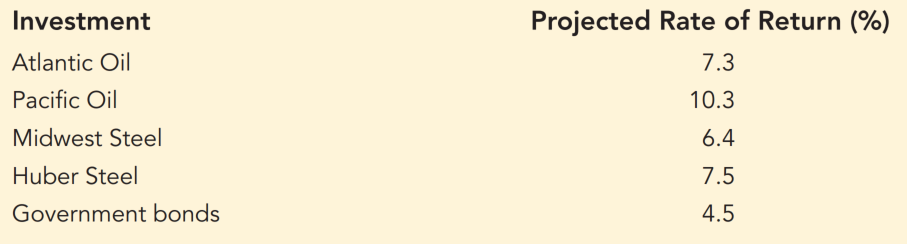

The management at Welte imposed the following investment guidelines:
1. Neither industry (oil or steel) should receive more than \\$50,000.
2. The amount invested in government bonds should be at least 25% of the steel industry investments.
3. The investment in Pacific Oil, the high-return but high-risk investment, cannot be more than 60% of the total oil industry investment.

What portfolio recommendations—investments and amounts—should be made for the available \\$100,000?

### Step 1: Define the decision variables

<p style="color:red;">Grab a piece of paper and write down the decision variables</p>


$x_1=$ dollars invested in Atlantic Oil<br/>
$x_2=$ dollars invested in Pacific Oil<br/>
$x_3=$ dollars invested in Midwest Steel<br/>
$x_4=$ dollars invested in Huber Steel<br/>
$x_5=$ dollars invested in government bonds<br/>

### Step 2: Write the Objective Function

<p style="color:red;">On a piece of paper and write down the objective function and specify whether this is a maximization problem or a minimization problem.</p>

$\max(0.073 x_1 + 0.103 x_2 + 0.064 x_3 + 0.075 x_4 + 0.045 x_5)$

### Step 3: Write down the Constraints
<p style="color:red;">How many constraints are there? Write the mathematical formula for each constraint</p>

#### Constraint 1: Available Investment
$x_1+x_2+x_3+x_4+x_5=100000$

#### Constraint 2: Neither the oil nor steel industry should receive more than \\$50,000
$x_1+x_2 \leq 50000$<br/>
$x_3 + x_4 \leq 50000$

#### Constraint 3: the amount invested in government bonds be at least 25\% of the steel industry investment
$x_5 \geq 0.25(x_3 + x_4)$

#### Constraint 4: Pacific Oil cannot be more than 60% of the total oil industry investment
$x_2 \leq 0.6(x_1+x_2)$

#### Constraint 5: Non-negativity
$x_1, x_2, x_3, x_4, x_5 \geq 0$

### Step 4: Model the Problem in Python
<p style="color:red;">Using the python code snippets covered in the previous lesson, model the problem in python. Feel free to use either PyMProg or the PuLP library</p>

##### Implementation using PyMProg Library

In [9]:
import pymprog as pm
pm.begin('Investment Portfolio')
pm.verbose(True)
x1, x2, x3, x4, x5  = pm.var('x1, x2, x3, x4, x5')
pm.maximize(0.073*x1+0.103*x2+0.064*x3+0.075*x4+0.045*x5, 'Return')
x1 + x2 + x3 + x4 + x5 == 100000
x1 + x2 <= 50000
x3 + x4 <= 50000
x5 >= 0.25 * (x3 + x4)
x2 <= 0.6 * (x1 + x2)
pm.solve()
print 'Max Return', pm.vobj()
pm.sensitivity()
pm.end()

Max Return: 0.073 * x1 + 0.103 * x2 + 0.064 * x3 + 0.075 * x4 + 0.045 * x5
R1: (x1 + x2 + x3 + x4 + x5==100000)
R2: x1 + x2 <= 50000
R3: x3 + x4 <= 50000
R4: x5 - 0.25 * ( x3 + x4 ) >= 0
R5: x2 - 0.6 * ( x1 + x2 ) <= 0
Max Return 8000.0

PyMathProg 1.0 Sensitivity Report Created: 2019/07/23 Tue 23:35PM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
*x1                    20000            0        0.073        0.018        0.103
*x2                    30000            0        0.103        0.073 1.79769e+308
 x3                        0       -0.011        0.064         -inf        0.075
*x4                    40000            0        0.075        0.064       0.1025
*x5                    10000            0        0.045 -1.79769e+308        0.075
Note: rows marked with a * list a basic variable.

Constraint       Activity Dual.Value  Lower.Bnd  Upper.Bnd RangeLower RangeUp

model('Investment Portfolio') is not the default model.

##### Implementation using PuLP Library

In [13]:
from pulp import *
prob = LpProblem("WaletInvestment", LpMaximize)
x1 = LpVariable("x1", lowBound=0, cat='Integer')
x2 = LpVariable("x2", lowBound=0, cat='Integer')
x3 = LpVariable("x3", lowBound=0, cat='Integer')
x4 = LpVariable("x4", lowBound=0, cat='Integer')
x5 = LpVariable("x5", lowBound=0, cat='Integer')
prob += 0.073*x1 + 0.103*x2 + 0.064*x3 + 0.075*x4 + 0.045*x5 # the new objective function
prob += x1 + x2 + x3 + x4 + x5 == 100000
prob += x1 + x2 <= 50000
prob += x3 + x4 <= 50000
prob += x5 >= 0.25* (x3 + x4)
prob += x2 <= 0.60 * (x1 + x2)

In [14]:
status = prob.solve()
LpStatus[status]

'Optimal'

In [15]:
for v in prob.variables():
    print v.name, '=', v.varValue
print 'Objective Function Value:', value(prob.objective)

x1 = 20000.0
x2 = 30000.0
x3 = 0.0
x4 = 40000.0
x5 = 10000.0
Optimal: 8000.0


## Transportation Planning
Foster Generators works in goods transportation industry. They are involved in the transportation of a product from three plants to four distribution centers. Foster Generators operates plants in Cleveland, Ohio; Bedford, Indiana; and York, Pennsylvania. Production capacities over the next three-month planning period for one type of generator are as follows:

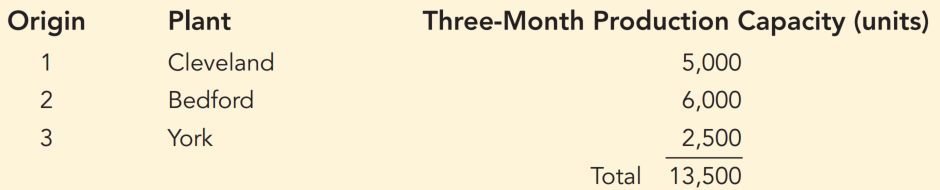

The firm distributes its generators through four regional distribution centers located in Boston, Massachusetts; Chicago, Illinois; St. Louis, Missouri; and Lexington, Kentucky; the three-month forecast of demand for the distribution centers is as follows:

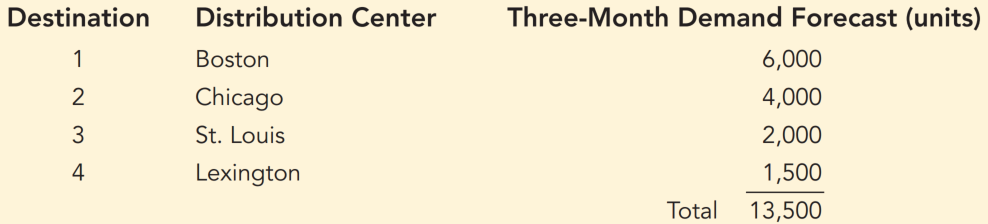

**Management would like to determine how much of its production should be shipped
from each plant to each distribution center.**

The following graph shows the 12 distribution routes Foster can use. The cost for each unit shipped on each route is shown on each arc in figure below:

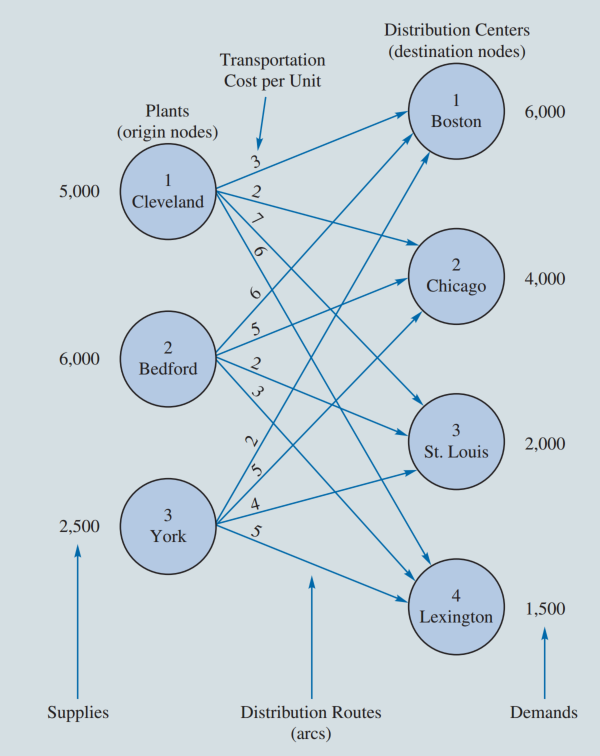



The following table list the costs:

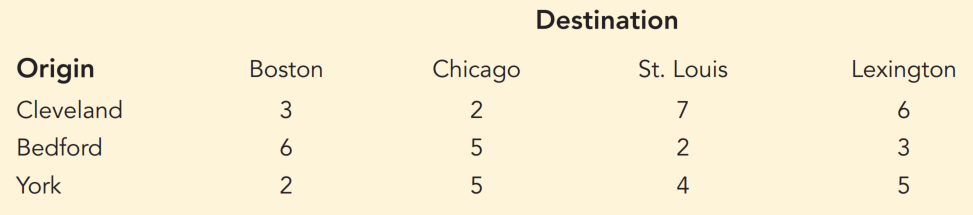

For Foster’s transportation problem, the objective is to determine the routes to be used
and the quantity to be shipped via each route that will provide the minimum total transportation cost. 

### Step 1: Define the decision variables

<p style="color:red;">Grab a piece of paper and write down the decision variables</p>

$x_{ij}=$ number of units shipped from origin $i$ to destination $j$<br>
where $i=1,2,\ldots,m$ and $j=1,2,\ldots,n$ and $m=3, n=4$<br/>

Since we want to minimize the total transportation cost:

### Step 2: Determine Objective Function- the cost of shipping from each city
<p style="color:red;">On a piece of paper and write down the objective function and specify whether this is a maximization problem or a minimization problem.</p>

Transportation costs for units shipped from Cleveland $=3x_{11} + 2x_{12} + 7x_{13} + 6x_{14}$<br/>
Transportation costs for units shipped from Bedford $=6x_{21} + 5x_{22} + 2x_{23} + 3x_{24}$<br/>
Transportation costs for units shipped from York $=2x_{31} + 5x_{32} + 4x_{33} + 5x_{34}$<br/>

**The sum of these expressions** provides the objective function showing the total transportation cost for Foster Generators.

$3x_{11} + 2x_{12} + 7x_{13} + 6x_{14} + 6x_{21} + 5x_{22} + 2x_{23} + 3x_{24} + 2x_{31} + 5x_{32} + 4x_{33} + 5x_{34}$

### Step 3: Write down the Constraints
<p style="color:red;">How many constraints are there? Write the mathematical formula for each constraint</p>

<p style="color:red;">Consider the supply constraints first</p>

<p style="color:red;">Then consider the demand constraints</p>

#### Sypply Constraints:
$x_{11}+x_{12}+x_{13}+x+{14} \leq 5000$ ... Cleaveland supply<br/>
$x_{21}+x_{22}+x_{23}+x+{24} \leq 6000$ ... Bedford supply<br/>
$x_{31}+x_{32}+x_{33}+x+{34} \leq 2500$ ... Bedford supply<br/>
#### Demand Constraints:
$x_{11}+x_{21}+x_{31} = 6000$ ... Boston demand<br/>
$x_{12}+x_{22}+x_{32} = 4000$ ... Chicago demand<br/>
$x_{13}+x_{23}+x_{33} = 2000$ ... St. Louis demand<br/>
$x_{14}+x_{24}+x_{34} = 1500$ ... Lexington demand<br/>


### Step 4: The Model
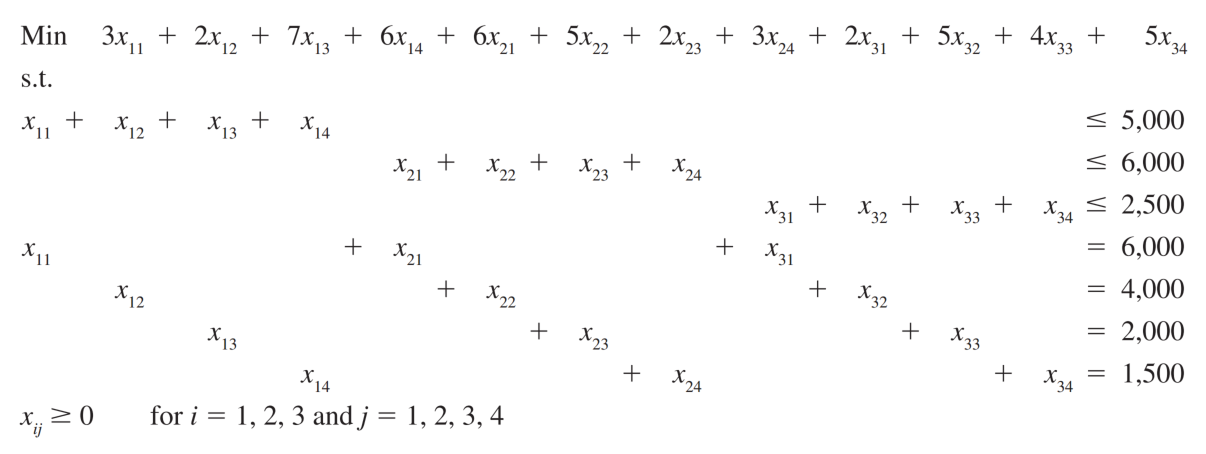

<p style="color:red;">Using the python code snippets covered in the previous lesson, model the problem in python. Implement first using the PyMProg library then write anothre implementation using the PuLP library</p>

##### Implementation using PyMProg Library

In [18]:
import pymprog as pm
pm.begin('Transportation')
pm.verbose(True)

x11, x12, x13, x14, x21, x22, x23, x24, x31, x32, x33, x34  = \
pm.var('x11, x12, x13, x14, x21, x22, x23, x24, x31, x32, x33, x34')

pm.minimize(3*x11+2*x12+7*x13+6*x14+6*x21+5*x22+2*x23+3*x24+2*x31+5*x32+4*x33+5*x34, 'Cost')

x11+x12+x13+x14 <= 5000
x21+x22+x23+x24 <= 6000
x31+x32+x33+x34 <= 2500

x11+x21+x31 == 6000
x12+x22+x32 == 4000
x13+x23+x33 == 2000
x14+x24+x34 == 1500


pm.solve()
print 'Min Transportation Cost', pm.vobj()
pm.sensitivity()
pm.end()

Min Cost: 3 * x11 + 2 * x12 + 7 * x13 + 6 * x14 + 6 * x21 + 5 * x22 + 2 * x23 + 3 * x24 + 2 * x31 + 5 * x32 + 4 * x33 + 5 * x34
R1: x11 + x12 + x13 + x14 <= 5000
R2: x21 + x22 + x23 + x24 <= 6000
R3: x31 + x32 + x33 + x34 <= 2500
R4: (x11 + x21 + x31==6000)
R5: (x12 + x22 + x32==4000)
R6: (x13 + x23 + x33==2000)
R7: (x14 + x24 + x34==1500)
Min Transportation Cost 39500.0

PyMathProg 1.0 Sensitivity Report Created: 2019/07/24 Wed 00:35AM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
*x11                    3500            0            3           -1            3
*x12                    1500            0            2            2            5
 x13                       0            8            7           -1          inf
 x14                       0            6            6            0          inf
 x21                       0            0            6            6      

model('Transportation') is not the default model.

##### Implementation using PyMProg Library

In [22]:
from pulp import *
prob = LpProblem("TransportationCost", LpMinimize)
x11 = LpVariable("x11", lowBound=0, cat='Integer')
x12 = LpVariable("x12", lowBound=0, cat='Integer')
x13 = LpVariable("x13", lowBound=0, cat='Integer')
x14 = LpVariable("x14", lowBound=0, cat='Integer')
x21 = LpVariable("x21", lowBound=0, cat='Integer')
x22 = LpVariable("x22", lowBound=0, cat='Integer')
x23 = LpVariable("x23", lowBound=0, cat='Integer')
x24 = LpVariable("x24", lowBound=0, cat='Integer')
x31 = LpVariable("x31", lowBound=0, cat='Integer')
x32 = LpVariable("x32", lowBound=0, cat='Integer')
x33 = LpVariable("x33", lowBound=0, cat='Integer')
x34 = LpVariable("x34", lowBound=0, cat='Integer')

prob += 3*x11+2*x12+7*x13+6*x14+6*x21+5*x22+2*x23+3*x24+2*x31+5*x32+4*x33+5*x34 # the new objective function
prob += x11+x12+x13+x14 <= 5000
prob += x21+x22+x23+x24 <= 6000
prob += x31+x32+x33+x34 <= 2500
prob += x11+x21+x31 == 6000
prob += x12+x22+x32 == 4000
prob += x13+x23+x33 == 2000
prob += x14+x24+x34 == 1500



In [23]:
status = prob.solve()
LpStatus[status]

'Optimal'

In [24]:
for v in prob.variables():
    print v.name, '=', v.varValue
print 'Objective Function Value:', value(prob.objective)

x11 = 1000.0
x12 = 4000.0
x13 = 0.0
x14 = 0.0
x21 = 2500.0
x22 = 0.0
x23 = 2000.0
x24 = 1500.0
x31 = 2500.0
x32 = 0.0
x33 = 0.0
x34 = 0.0
Optimal: 39500.0


<p style="color:red;">Note that above code snippets are giving different optimal solutions!!</p>

## Generating an Alternative Optimal Solution for a Linear Program
Consider the solution produced by the code written using the PuLP library. The optimal cost was \\$39,500. Let us revise the model:

### Take the Objective Function and make it a Constraint equal to \\$39,500
$3x_{11} + 2x_{12} + 7x_{13} + 6x_{14} + 6x_{21} + 5x_{22} + 2x_{23} + 3x_{24} + 2x_{31} + 5x_{32} + 4x_{33} + 5x_{34} = 39500$<br/>
But what is the Objective Function now?

### Make a New Objective Function
Sum of those variables that were equal to zero in the soluiton.

We can see that $x_{13}=x_{14}=x_{22}=x_{32}=x_{33}=x_{34}=0$<br/>
so the new objective function is<br/>
$\max(x_{13}+x_{14}+x_{22}+x_{32}+x_{33}+x_{34})$

In [34]:
from pulp import *
prob = LpProblem("TransportationCost", LpMaximize)
x11 = LpVariable("x11", lowBound=0, cat='Integer')
x12 = LpVariable("x12", lowBound=0, cat='Integer')
x13 = LpVariable("x13", lowBound=0, cat='Integer')
x14 = LpVariable("x14", lowBound=0, cat='Integer')
x21 = LpVariable("x21", lowBound=0, cat='Integer')
x22 = LpVariable("x22", lowBound=0, cat='Integer')
x23 = LpVariable("x23", lowBound=0, cat='Integer')
x24 = LpVariable("x24", lowBound=0, cat='Integer')
x31 = LpVariable("x31", lowBound=0, cat='Integer')
x32 = LpVariable("x32", lowBound=0, cat='Integer')
x33 = LpVariable("x33", lowBound=0, cat='Integer')
x34 = LpVariable("x34", lowBound=0, cat='Integer')

prob += x13+x14+x22+x32+x33+x34 # the new objective function
prob += 3*x11+2*x12+7*x13+6*x14+6*x21+5*x22+2*x23+3*x24+2*x31+5*x32+4*x33+5*x34==39500 # the new constraint
prob += x11+x12+x13+x14 <= 5000
prob += x21+x22+x23+x24 <= 6000
prob += x31+x32+x33+x34 <= 2500
prob += x11+x21+x31 == 6000
prob += x12+x22+x32 == 4000
prob += x13+x23+x33 == 2000
prob += x14+x24+x34 == 1500

In [35]:
status = prob.solve()
LpStatus[status]

'Optimal'

In [36]:
for v in prob.variables():
    print v.name, '=', v.varValue
print 'Objective Function Value:', value(prob.objective)

x11 = 3500.0
x12 = 1500.0
x13 = 0.0
x14 = 0.0
x21 = 0.0
x22 = 2500.0
x23 = 2000.0
x24 = 1500.0
x31 = 2500.0
x32 = 0.0
x33 = 0.0
x34 = 0.0
Objective Function Value: 2500.0


## In Summary
the general approach for trying to find an alternative optimal solution to a linear program is as follows:
- **Step 1.** Solve the linear program
- **Step 2.** Make a new objective function to be maximized. It is the sum of those variables that were equal to zero in the solution from Step 1
- **Step 3.** Keep all the constraints from the original problem. Add a constraint that forces the original objective function to be equal to the optimal objective function value from Step 1
- **Step 4.** Solve the problem created in Steps 2 and 3. If the objective function value is positive, you have found an alternative optimal solution

<p style="color:red;">Apply the above general approach to your code snippet written using the PyMProg library and confirm that the approach is working.</p>

In [38]:
import pymprog as pm
pm.begin('Transportation')
pm.verbose(True)

x11, x12, x13, x14, x21, x22, x23, x24, x31, x32, x33, x34  = \
pm.var('x11, x12, x13, x14, x21, x22, x23, x24, x31, x32, x33, x34')

pm.maximize(x13+x14+x21+x32+x33+x34, 'Cost')


3*x11+2*x12+7*x13+6*x14+6*x21+5*x22+2*x23+3*x24+2*x31+5*x32+4*x33+5*x34 == 39500
x11+x12+x13+x14 <= 5000
x21+x22+x23+x24 <= 6000
x31+x32+x33+x34 <= 2500

x11+x21+x31 == 6000
x12+x22+x32 == 4000
x13+x23+x33 == 2000
x14+x24+x34 == 1500


pm.solve()
print 'Max Alternative', pm.vobj()
pm.sensitivity()
pm.end()

Max Cost: x13 + x14 + x21 + x32 + x33 + x34
R1: (3 * x11 + 2 * x12 + 7 * x13 + 6 * x14 + 6 * x21 + 5 * x22 + 2 * x23 + 3 * x24 + 2 * x31 + 5 * x32 + 4 * x33 + 5 * x34==39500)
R2: x11 + x12 + x13 + x14 <= 5000
R3: x21 + x22 + x23 + x24 <= 6000
R4: x31 + x32 + x33 + x34 <= 2500
R5: (x11 + x21 + x31==6000)
R6: (x12 + x22 + x32==4000)
R7: (x13 + x23 + x33==2000)
R8: (x14 + x24 + x34==1500)
Max Alternative 2500.0

PyMathProg 1.0 Sensitivity Report Created: 2019/07/24 Wed 08:44AM
Variable            Activity   Dual.Value     Obj.Coef   Range.From   Range.Till
--------------------------------------------------------------------------------
*x11                    1000            0            0            0            0
*x12                    4000            0            0    -0.333333 1.79769e+308
 x13                       0    -0.666667            1         -inf      1.66667
*x14                       0            0            1            1 1.79769e+308
*x21                    2500       

model('Transportation') is not the default model.

# Integer Linear Programming

- If all variables are required to be an integer, we have an **all-integer linear program**.
- If some, but not necessarily all, variables are required to be integer, we have a **mixed-integer linear program**. 
- In some applications, the integer variables may take on only the values 0 or 1. Then we have a **binary integer linear program**.

## Eastborne Realty, an Example of Integer Optimization
Eastborne Realty has \\$2 million available for the purchase of new rental property. After an initial screening, Eastborne reduced the investment alternatives to townhouses and apartment buildings. Each townhouse can be purchased for \\$282,000, and five are available. Each apartment building can be purchased for \\$400,000, and the developer will construct as many buildings as Eastborne wants to purchase.

Eastborne’s property manager can devote up to 140 hours per month to these new properties;
- Each townhouse is expected to require 4 hours per month, and
- Each apartment building is expected to require 40 hours per month.

The annual cash flow, after deducting mortgage payments and operating expenses, is estimated to be 
- \\$10,000 per townhouse and 
- \\$15,000 per apartment building. 

Eastborne’s owner would like to determine the number of townhouses and the number of apartment buildings to purchase to maximize annual cash flow.

### Linear Modeling
#### Step 1: Defining Decision Variables
<p style="color:red;">Write down the decision variables for this problem</p>

$T=$ number of townhouses<br/>
$A=$ number of apartment buildings

#### Step 2: Defind the Objective Function

$\max(10T+15A)$ in thousands of dollars

#### Step 3: Define Constraints

$282 T+400 A \leq 2000$ ... funds available (in thousands)<br/>
$4 T + 40 A \leq 140$ ... Manager's time (hours)<br/>
$T \leq 5$ ... Townhouses available

The variables T and A must be nonnegative. In addition, the purchase of **a fractional number of townhouses and/or a fractional number of apartment buildings** is unacceptable.

The model is:
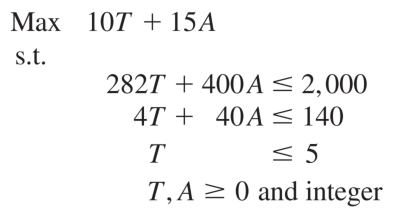

### The Geometry of the Model
The optimal solution is at $b=(T=2.479, A=3.252)$

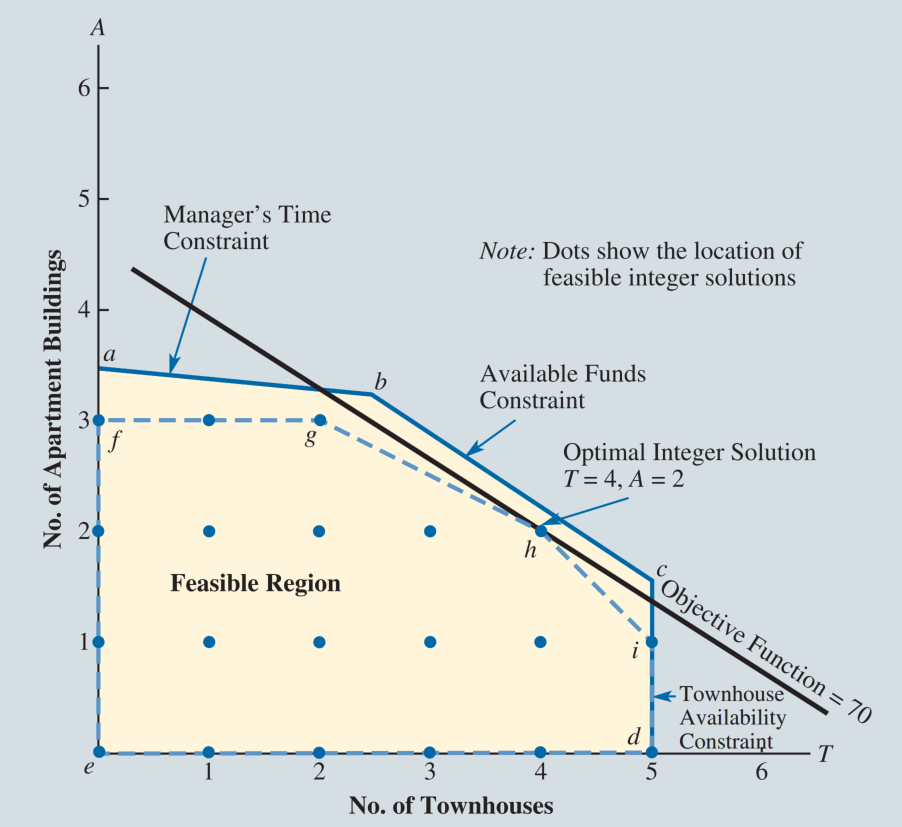

the feasible region is the set of integer points that lie within the feasible region of the LP Relaxation. There are 20 such feasible solutions (designated by blue dots in the figure). The region bounded by the dashed lines is known as the **convex hull** of the set of feasible integer solutions.

#### Solution
- Optimal Value of the Objective Function is \\$70,000
- Optimal value occurs at $T=4$ and $A=2$
- None of the three constraints is binding
- We have \\$72,000 unused budget (slack in budget)
- We have 44 unued hours (slack in hours
- We are under the limit of 5 townouses by 1

<p style="color:red;">Write the python model to confirm the above</p>